In [43]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def mostrar(X, c=None, centroids=None,i=0,j=0):

    # Creamos los mapas de colores a utilizar
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))

    # Pintamos los puntos
    plt.scatter(X.iloc[:, i], X.iloc[:, j], c=c, cmap=cmap_bold, s=60)

    # Pintamos los centroides si los hay
    # ligero cambios con respecto a la función del notebook anterior
    if centroids is not None:
        plt.scatter(centroids[:,i], centroids[:,j], marker='*', c=range(centroids.shape[0]), s=500)

    # Mostramos la figura
    plt.show()

In [44]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('iris.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
df = df.drop(columns=['class'])

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler=MinMaxScaler()
scaler.fit(df)
df_norm = scaler.transform(df)

In [50]:
df_norm = pd.DataFrame(df_norm, index=df.index, columns= df.columns)

In [15]:
df_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# K-means sklearn

In [51]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=3,n_init=10, init="random")

In [52]:
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [53]:
kmeans=kmeans.fit(df_norm)

In [54]:
centros=kmeans.cluster_centers_

In [55]:
labels=kmeans.labels_

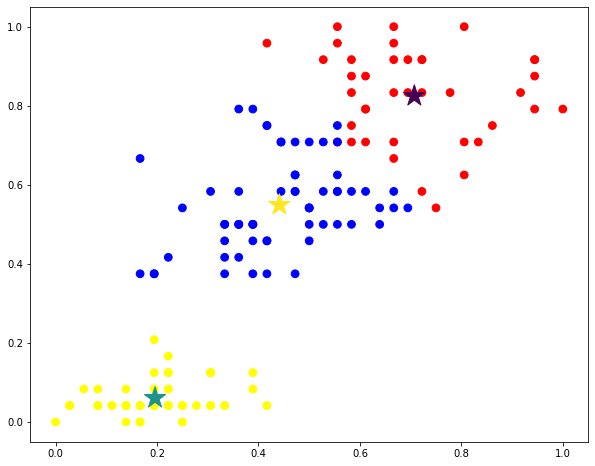

In [56]:
mostrar(df_norm,labels,centros,i=0,j=3)

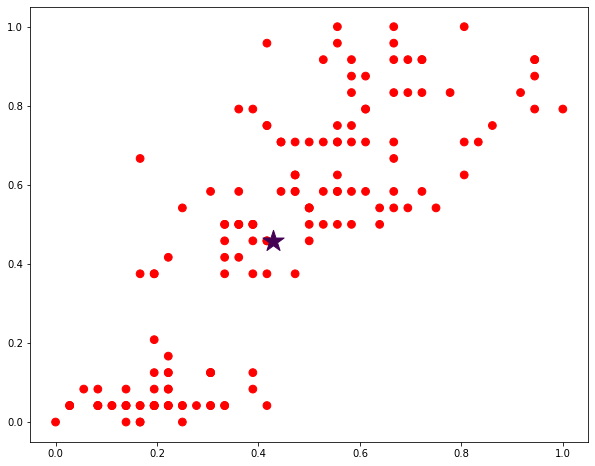

1 41.16611042137329 1


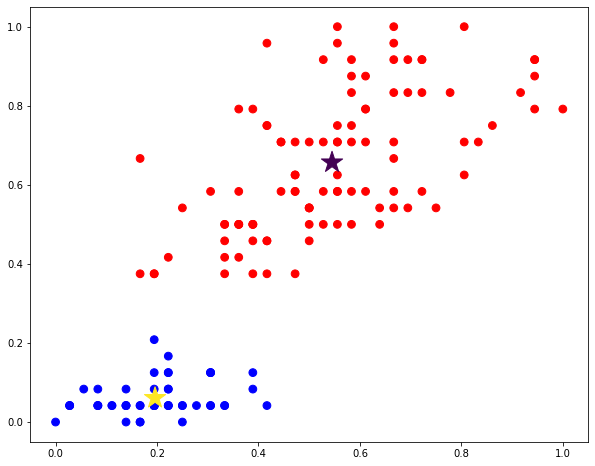

2 12.127790750538193 2


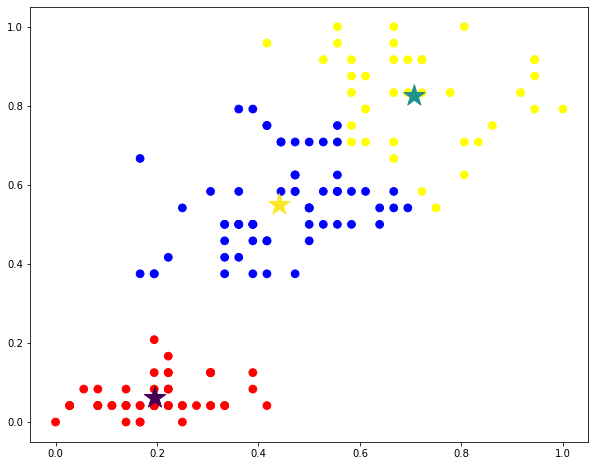

3 6.982216473785235 3


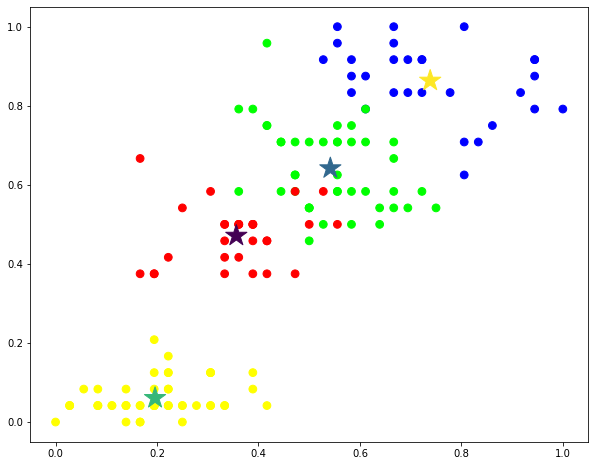

4 5.516933472040371 4


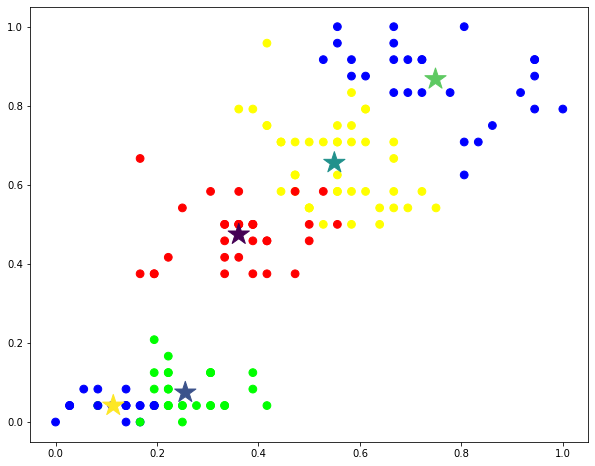

5 4.58977540011789 5


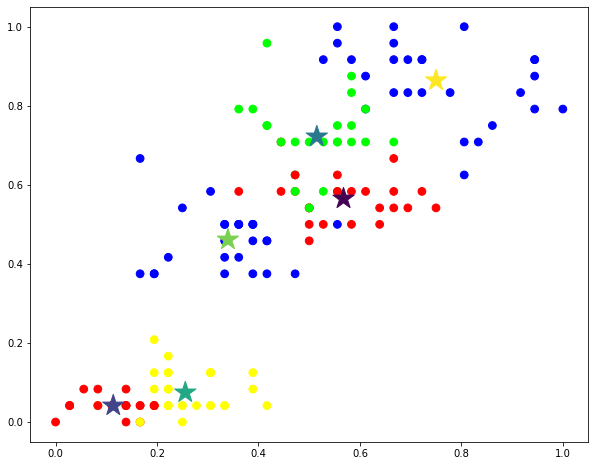

6 4.047833652523183 6


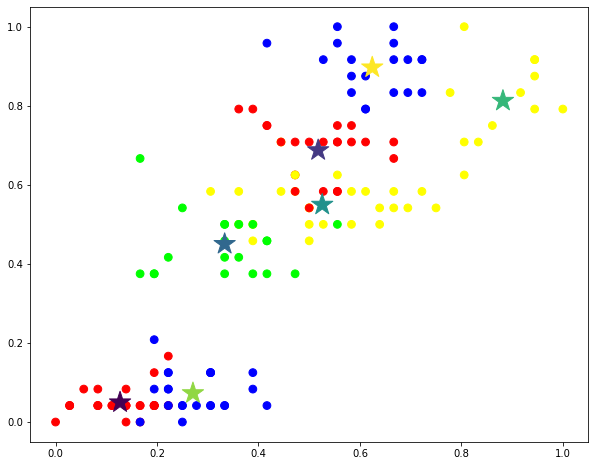

7 3.4927987965598817 7


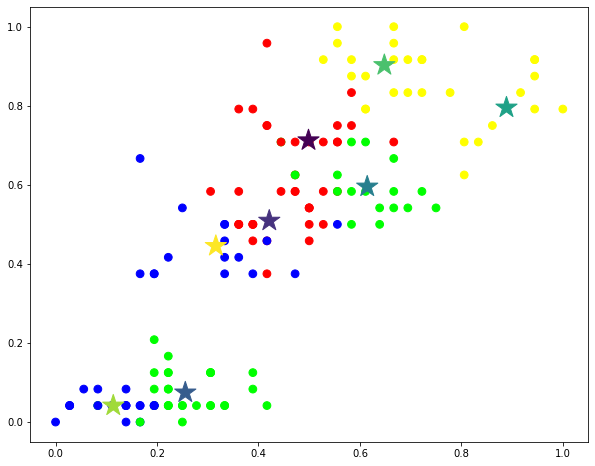

8 3.148110161765468 8


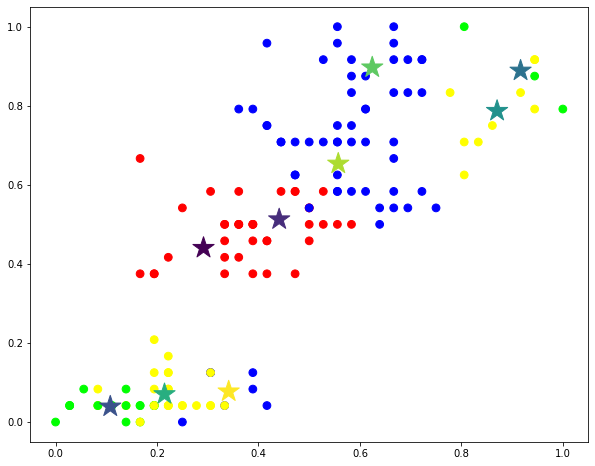

9 2.9550838593396502 9


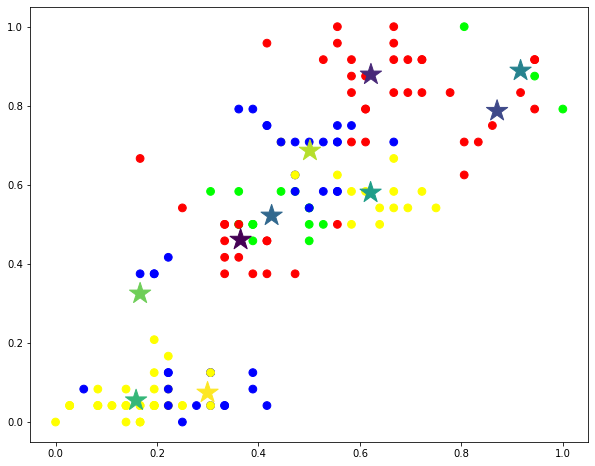

10 2.7308719297937842 10


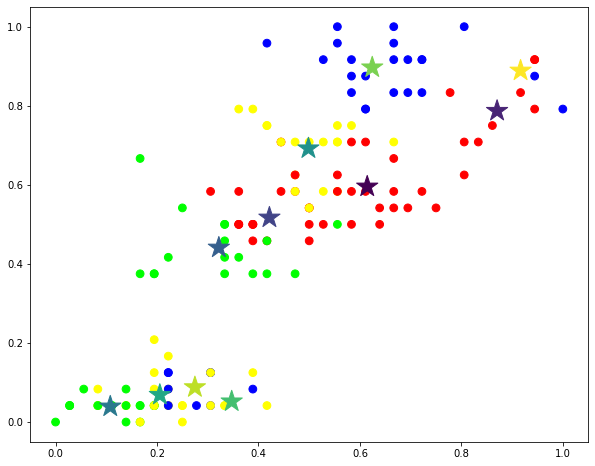

11 2.4506371216778065 11


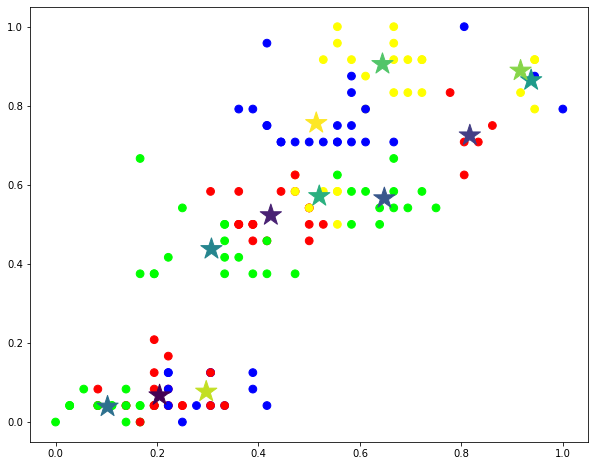

12 2.1870060897875234 12


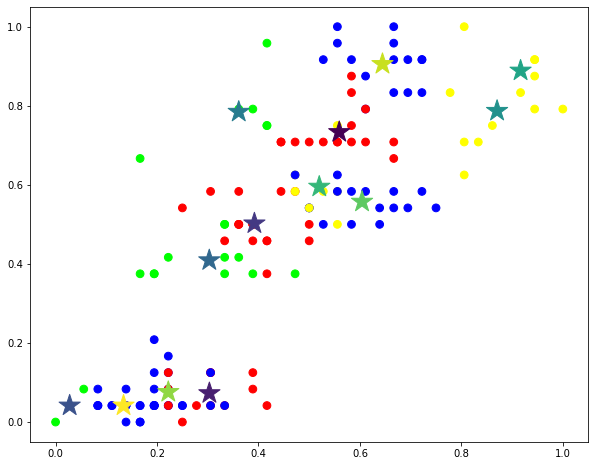

13 2.0501091296910228 13


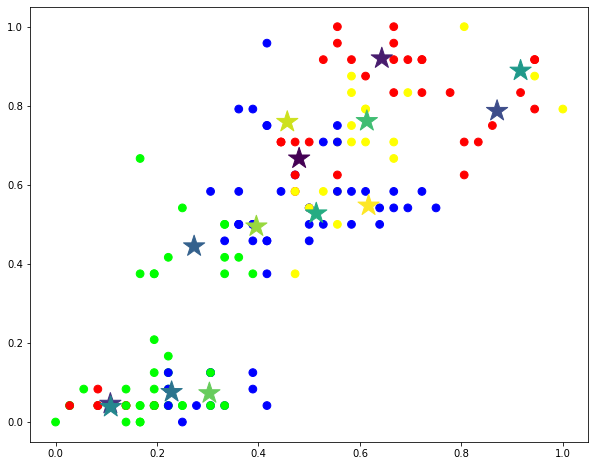

14 1.9804073129093402 14
14


In [33]:
best_k=1
best_inertia=99999
best_kmeans= None
for i in range(1,15):
    kmeans= KMeans(n_clusters=i,n_init=10, init="random")
    kmeans=kmeans.fit(df_norm)
    if(kmeans.inertia_<best_inertia):
        best_inertia=kmeans.inertia_
        best_kmeans=kmeans
        best_k=i
    mostrar(df_norm,kmeans.labels_,kmeans.cluster_centers_,i=0,j=3)
    print(i,kmeans.inertia_,best_k)

print(best_k)

    


In [34]:
from sklearn.metrics import silhouette_score

In [59]:
kmeans= KMeans(n_clusters=3,n_init=10, init="random")
kmeans=kmeans.fit(df_norm)
print(kmeans.labels_)
silhouette_score(df_norm,kmeans.labels_,metric="euclidean")


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


0.5047687565398589

In [67]:
best_k=1
best_inertia=-1
score=[]
best_kmeans=None
for i in range(2,15):
    kmeans= KMeans(n_clusters=i,n_init=10, init="random")
    kmeans=kmeans.fit(df_norm)
    if(silhouette_score(df_norm,kmeans.labels_,metric="euclidean")>best_inertia):
        best_inertia=silhouette_score(df_norm,kmeans.labels_,metric="euclidean")
        best_kmeans=kmeans
        best_k=i
        score.append(silhouette_score(df_norm,kmeans.labels_,metric="euclidean"))
    print(i,silhouette_score(df_norm,kmeans.labels_,metric="euclidean"),best_k)
    

print(best_k)


2 0.6300471284354711 2
3 0.5047687565398589 2
4 0.44506548804598556 2
5 0.3525708155722813 2
6 0.341879715927151 2
7 0.3333023138163141 2
8 0.33214618279028735 2
9 0.3334164293419069 2
10 0.32972581849044674 2
11 0.3189934392148787 2
12 0.3248438081344447 2
13 0.2788584050604104 2
14 0.28047342960552646 2
2


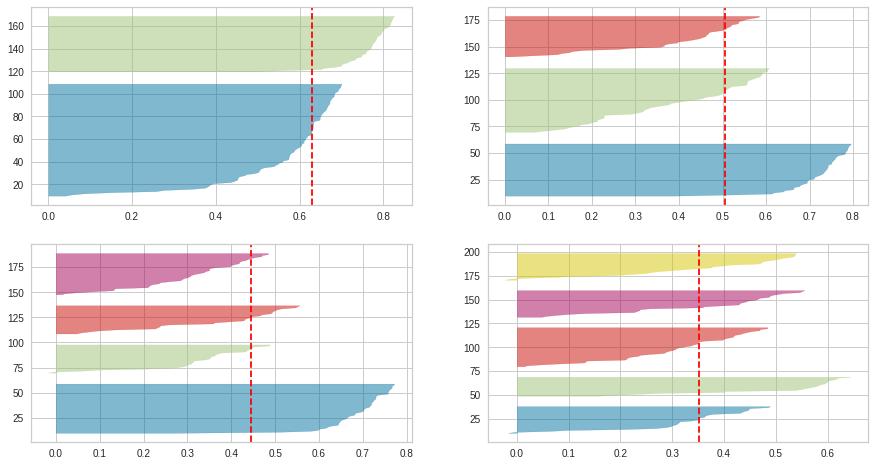

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_norm) 

Metodos intrisecos se vanapreguntar en el examen. Son metodos donde lo que usamos son solo los datos y los clusters. Los metodos extrinsecos por su parte son 